In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/bf/45/c961e3cb6ddad76b3

In [1]:
import tensorflow as tf
import os

In [2]:
# List available physical devices (GPUs)
gpus = tf.config.experimental.list_physical_devices('GPU')

# If GPUs are found, set memory growth to True
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
else:
    # If no GPUs are found, force TensorFlow to use the CPU
    tf.config.set_visible_devices([], 'GPU')


In [2]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

C:\Users\Soumyadip Bera\AppData\Local\Temp\ipykernel_6872\2896494265.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:
img = cv2.imread(os.path.join('data', 'FAKE', '1000 (2).jpg'))

In [5]:
img.shape

(32, 32, 3)

# Loading the Data

In [6]:
data = tf.keras.utils.image_dataset_from_directory('data', image_size=(32, 32))

Found 100000 files belonging to 2 classes.


In [7]:
data_it = data.as_numpy_iterator()

In [8]:
batch = data_it.next()

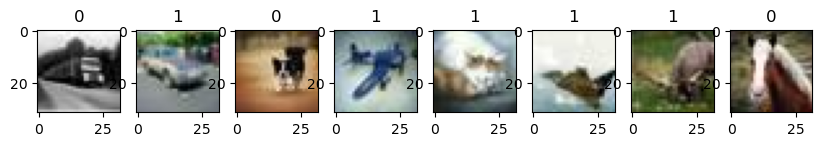

In [9]:
fig, ax = plt.subplots(ncols=8, figsize=(10, 10))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Preprocessing

In [10]:
print(batch[0].min())
print(batch[0].max())

0.0
255.0


In [11]:
#scaling betwwen 0 and 1
data = data.map(lambda x, y : (x/255, y))

In [12]:
scaled_it = data.as_numpy_iterator()

In [13]:
batch = scaled_it.next()

In [14]:
print(batch[0].min())
print(batch[0].max())

0.0
1.0


splitting the data into train, cross-validtion and test set

In [15]:
len(data)

3125

In [16]:
train_size = int(len(data)*0.7)
cv_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)+1

In [17]:
train = data.take(train_size)
cv = data.skip(train_size).take(cv_size)
test = data.skip(train_size+cv_size).take(test_size)

In [18]:
len(train)+len(cv)+len(test)

3125

# Building a DL Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (4, 4), 1, activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (4, 4), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (4, 4), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\Soumyadip Bera\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [24]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 29, 29, 16)     │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 2, 2, 16)       │         8,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,793 (69.50 KB)

 Trainable params: 17,793 (69.50 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
logdir = 'logs'

In [27]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [28]:
hist = model.fit(train, epochs=10, validation_data=cv, callbacks=[tensorboard_callback])

Epoch 1/10
2187/2187 ━━━━━━━━━━━━━━━━━━━━ 2035s 925ms/step - accuracy: 0.7391 - loss: 0.5088 - val_accuracy: 0.8453 - val_loss: 0.3601
Epoch 2/10
2187/2187 ━━━━━━━━━━━━━━━━━━━━ 151s 69ms/step - accuracy: 0.8512 - loss: 0.3478 - val_accuracy: 0.8547 - val_loss: 0.3416
Epoch 3/10
2187/2187 ━━━━━━━━━━━━━━━━━━━━ 150s 68ms/step - accuracy: 0.8779 - loss: 0.2931 - val_accuracy: 0.8906 - val_loss: 0.2621
Epoch 4/10
2187/2187 ━━━━━━━━━━━━━━━━━━━━ 154s 70ms/step - accuracy: 0.8895 - loss: 0.2668 - val_accuracy: 0.8936 - val_loss: 0.2577
Epoch 5/10
2187/2187 ━━━━━━━━━━━━━━━━━━━━ 170s 78ms/step - accuracy: 0.9003 - loss: 0.2435 - val_accuracy: 0.9037 - val_loss: 0.2401
Epoch 6/10
2187/2187 ━━━━━━━━━━━━━━━━━━━━ 162s 74ms/step - accuracy: 0.9070 - loss: 0.2297 - val_accuracy: 0.9094 - val_loss: 0.2249
Epoch 7/10
2187/2187 ━━━━━━━━━━━━━━━━━━━━ 165s 75ms/step - accuracy: 0.9128 - loss: 0.2169 - val_accuracy: 0.9060 - val_loss: 0.2347
Epoch 8/10
2187/2187 ━━━━━━━━━━━━━━━━━━━━ 127s 58ms/step - accuracy

# Performance

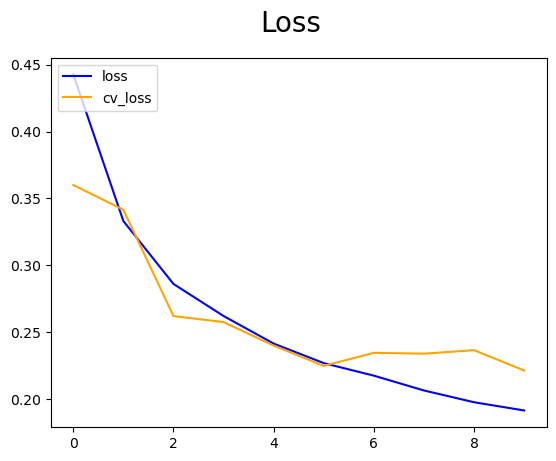

In [29]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='cv_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

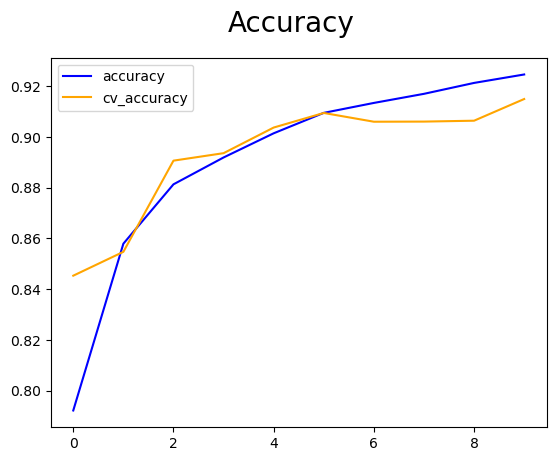

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='cv_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
pre = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [33]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 920ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━

In [34]:
print(f'Precision: {pre.result().numpy()}, Recall: {rec.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.9330061674118042, Recall: 0.8961065411567688, Accuracy: 0.9180311560630798
